In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('../Data/Accidents_zones_dbscan.csv')
df = df[['longitud', 'latitud', 'zona']]
df = df[df['zona'] != -1]

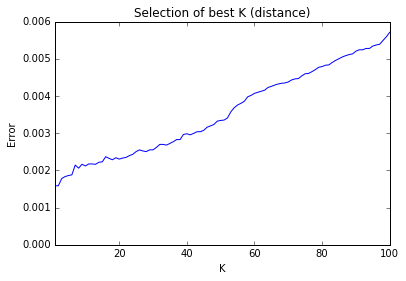

Best K: 1


In [3]:
train_p = 0.6
reps = 100
k_errors = [0] * 101

for rep in range(reps):
    df['is_train'] = np.random.uniform(0, 1, len(df)) <= train_p
    df_train = df[df['is_train'] == True]
    df_test = df[df['is_train'] == False]
    
    for n_neighbors in range(1, 101):
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
        clf.fit(df_train[['latitud', 'longitud']], df_train['zona'])
        Z = clf.predict(df_test[['latitud', 'longitud']])
        err = (df_test['zona'] != Z).sum() / len(df_test)
        
        k_errors[n_neighbors] += err

k_errors = map(lambda x : x / reps, k_errors)

plt.title('Selection of best K (distance)')
plt.ylabel('Error')
plt.xlabel('K')
plt.xlim(1, 100)
plt.plot(k_errors)
plt.show()

K = k_errors.index(reversed(min(k_errors[1:]))
print 'Best K: %d' % K